In [2]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("../../"))
df = pd.read_csv('../../Datas/iM_data.csv', encoding='cp949')

In [3]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../Codes/')))

In [4]:
from module.MyEncoder import MyRangeEncoder

In [5]:
filtered_cols = ['업종_대분류', '업종_중분류', '사업장_시도', '사업장_시군구', '법인_고객등급', '전담고객여부','기준년월']

In [6]:
encoder = MyRangeEncoder(mode = 'mean', nan_value=-1)
encodered_df = encoder.fit_transform(df, df.drop(columns=filtered_cols))

In [7]:
encodered_df

,기준년월,업종_대분류,업종_중분류,사업장_시도,사업장_시군구,법인_고객등급,전담고객여부,요구불예금잔액,거치식예금잔액,적립식예금잔액,...,여신_시설자금대출좌수,신용카드개수,외환_수출실적거래건수,외환_수입실적거래건수,창구거래건수,인터넷뱅킹거래건수,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수
0,202201,제조업,기타 기계 및 장비 제조업,대구광역시,서구,최우수,Y,250.00,0.0,0.0,...,0.0,15.5,0.0,0.0,15.5,35.5,0.0,0.0,0.0,45.5
1,202201,제조업,섬유제품 제조업; 의복제외,대구광역시,서구,최우수,Y,90.00,0.0,0.0,...,2.0,15.5,0.0,0.0,25.5,45.5,1.0,0.0,4.0,35.5
2,202201,부동산업,부동산업,대구광역시,북구,일반,N,0.11,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,8.0
3,202201,도매 및 소매업,도매 및 상품 중개업,대구광역시,서구,우수,Y,7.80,0.0,80.0,...,0.0,2.0,0.0,0.0,25.5,55.0,4.0,4.0,4.0,8.0
4,202201,운수 및 창고업,육상운송 및 파이프라인 운송업,경상북도,경주시,우수,Y,7.10,0.0,0.0,...,0.0,25.5,0.0,0.0,0.0,55.0,1.0,0.0,0.0,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347294,202412,건설업,전문직별 공사업,경상북도,청도군,일반,N,0.12,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5
347295,202412,건설업,전문직별 공사업,경상북도,청도군,우수,Y,76.00,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,35.5,0.0,0.0,0.0,25.5
347296,202412,"사업시설 관리, 사업 지원 및 임대 서비스업",사업지원 서비스업,경상북도,청도군,일반,Y,1.10,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0
347297,202412,"농업, 임업 및 어업",농업,경상북도,청도군,일반,N,12.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5


In [8]:
encodered_df.to_csv('../../Datas/인코딩된_data.csv')
encodered_df.to_excel('../../Datas/인코딩된_data.xlsx')

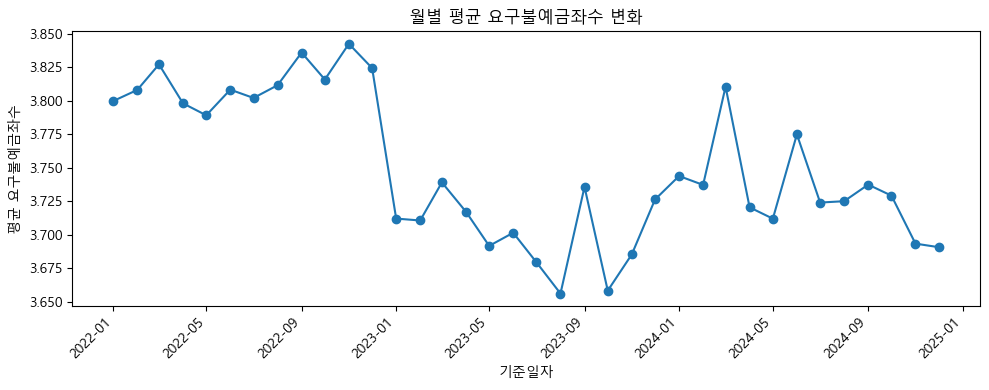

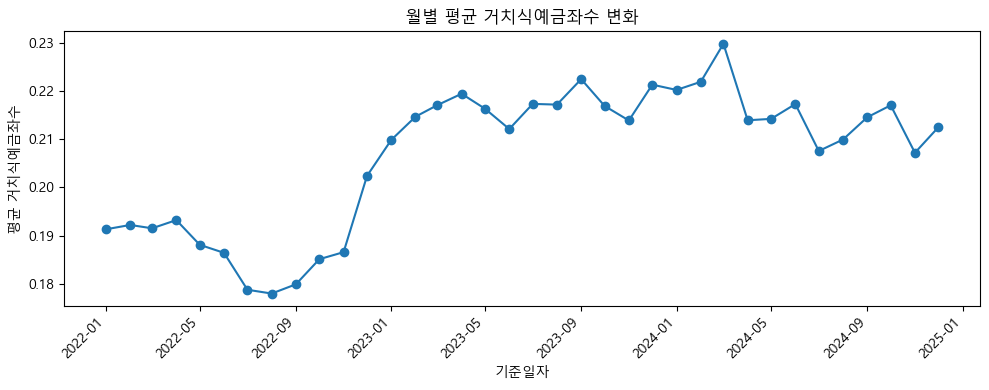

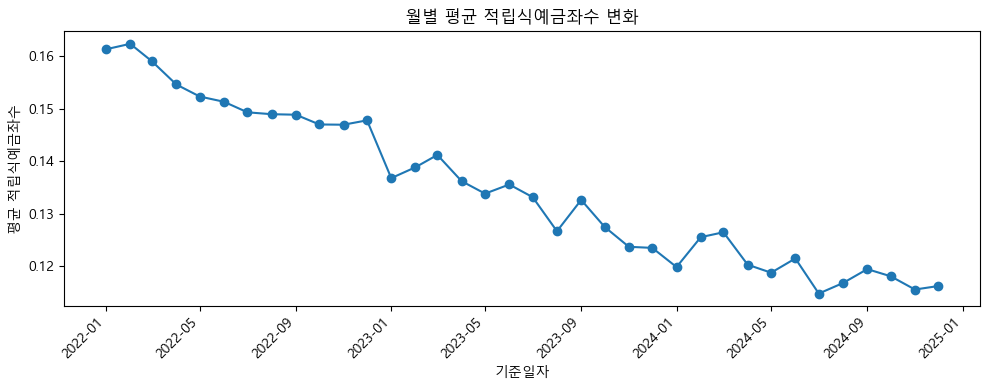

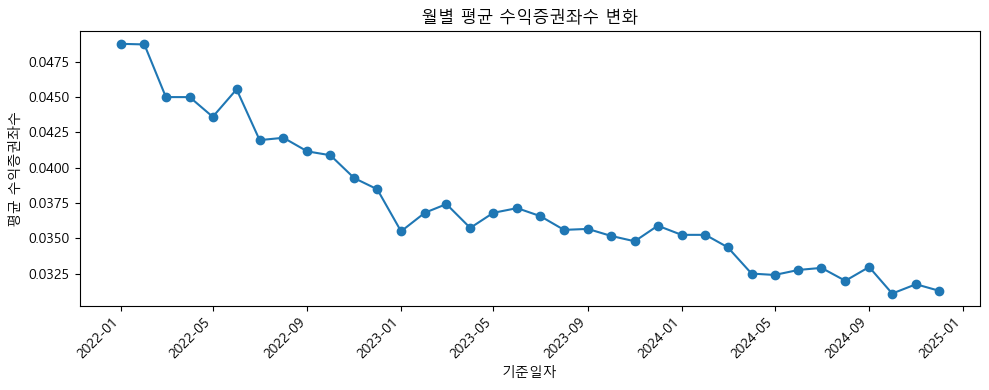

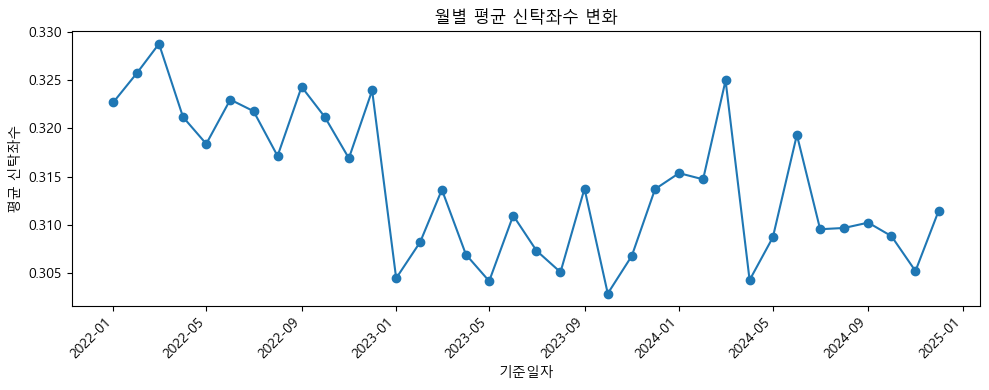

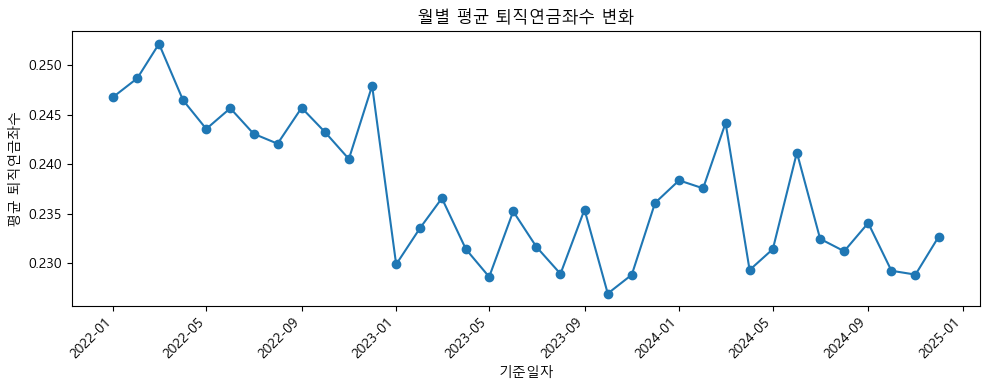

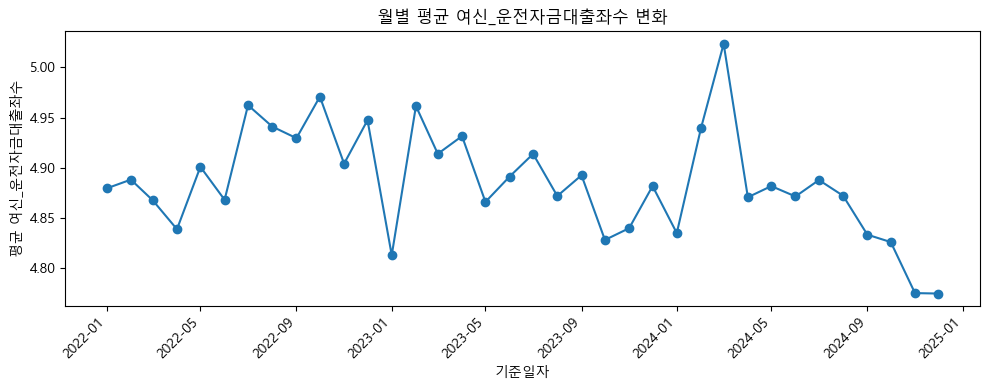

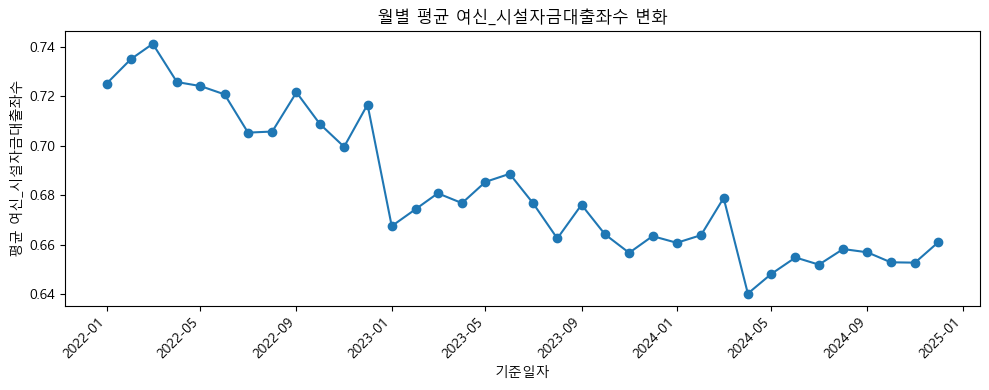

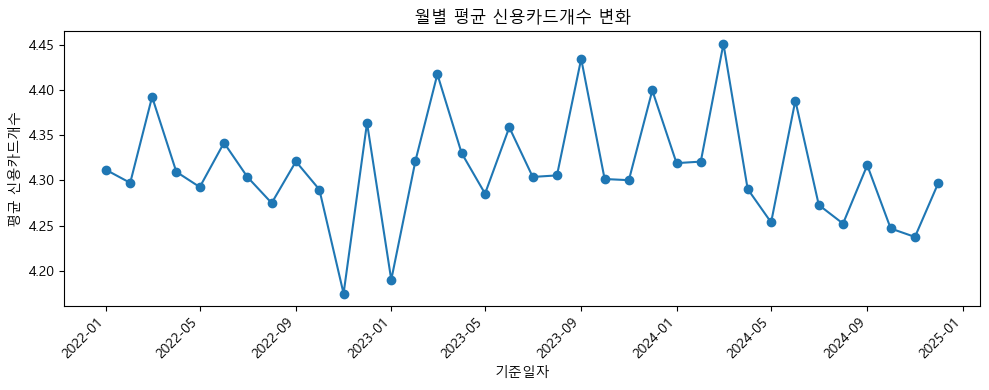

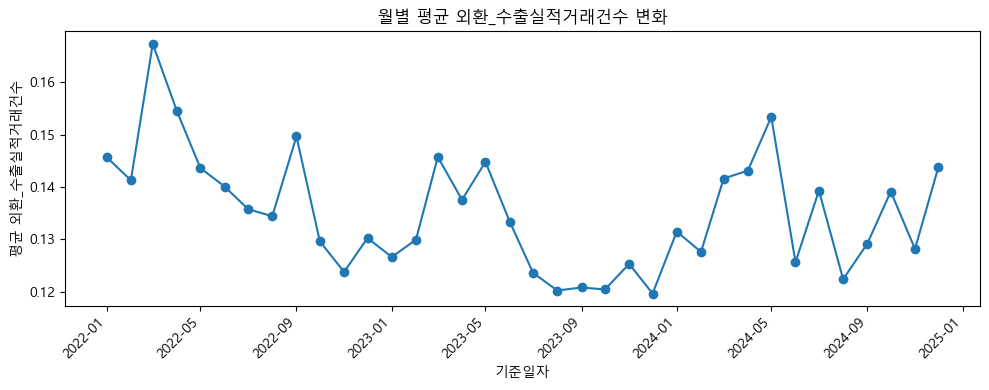

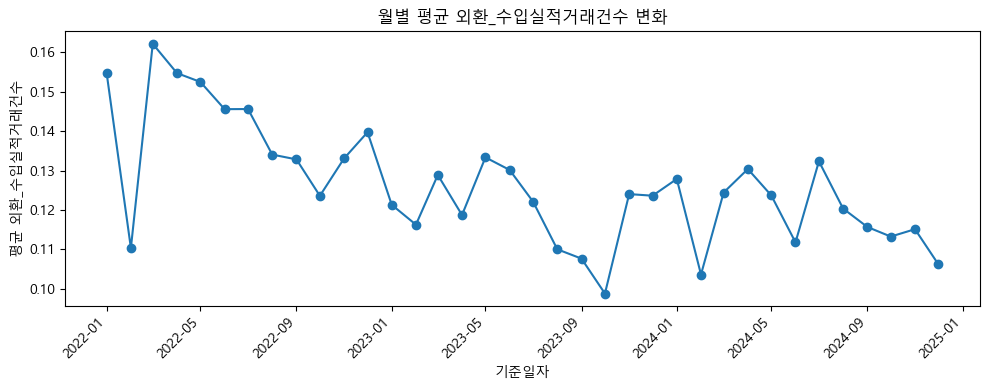

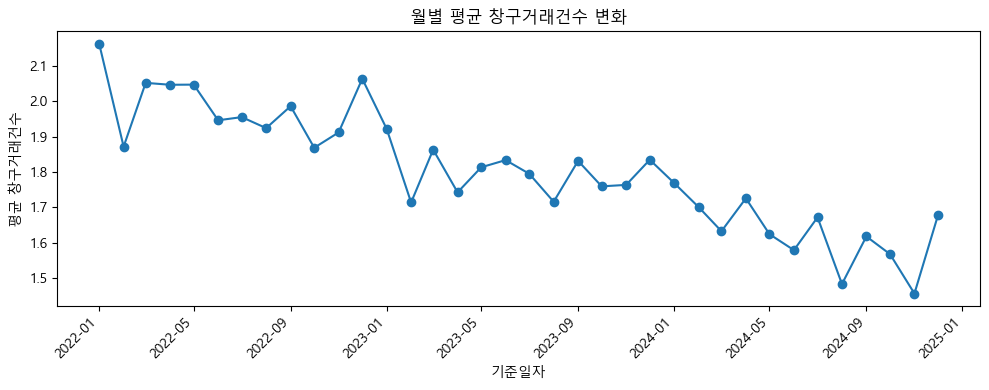

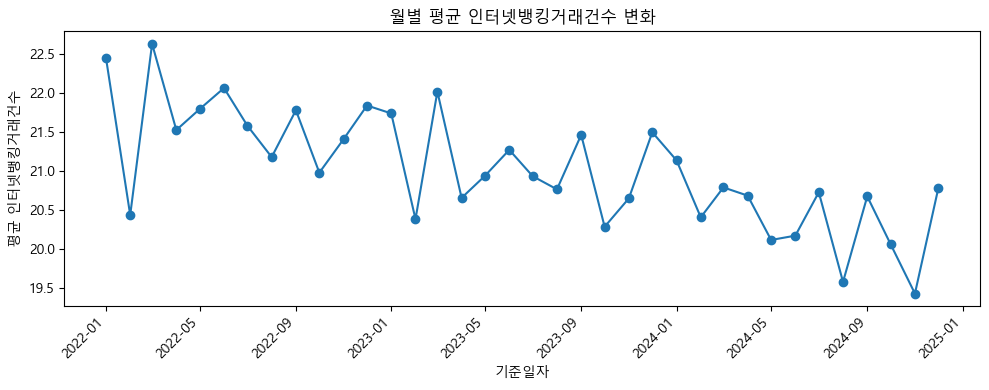

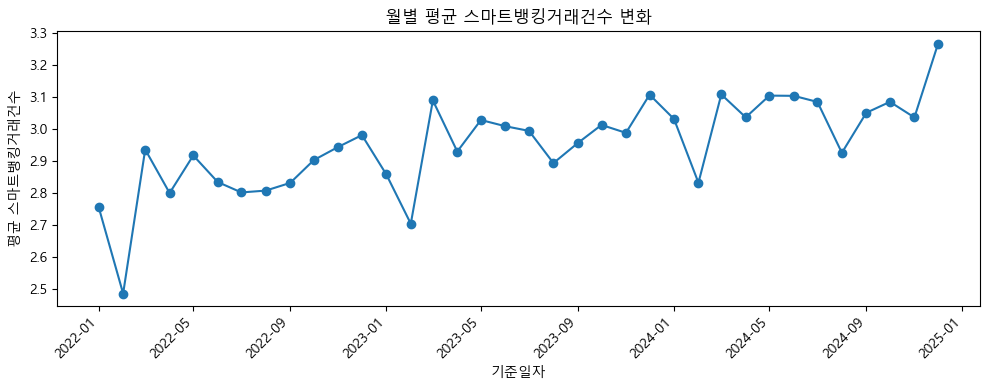

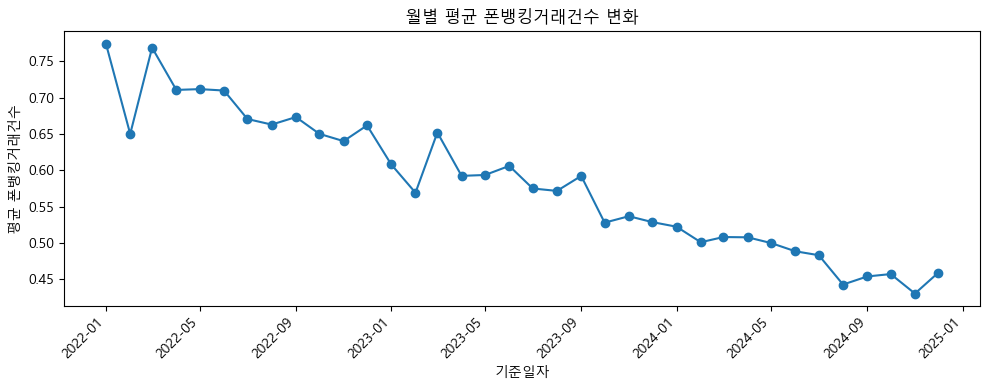

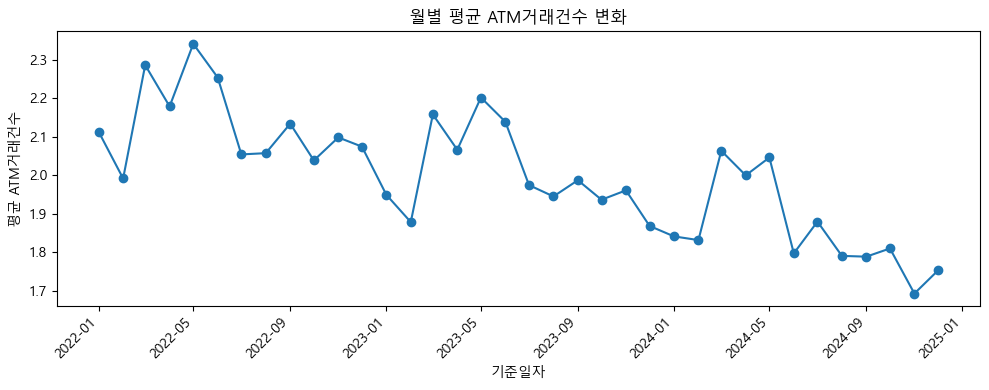

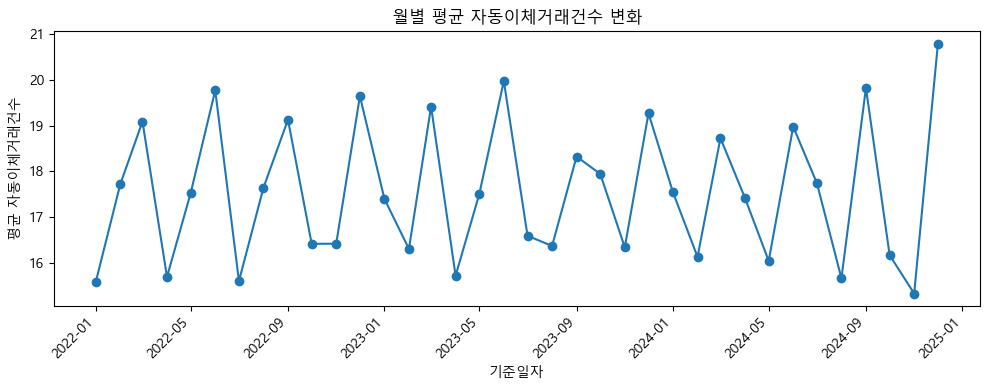

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 (인코딩된 파일 경로 확인)
df = pd.read_csv('../../Datas/인코딩된_data.csv')

# 기준년월을 datetime으로 변환
df['기준일자'] = pd.to_datetime(df['기준년월'].astype(str), format='%Y%m')

# 컬럼 리스트에서 요구불예금좌수부터 자동이체거래건수까지 선택
cols = list(df.columns)
start = cols.index('요구불예금좌수')
end = cols.index('자동이체거래건수') + 1
encoded_cols = cols[start:end]

# 월별 평균 계산
monthly_means = df.groupby('기준일자')[encoded_cols].mean().reset_index()

# 각 컬럼별 월별 변화 시각화
for col in encoded_cols:
    plt.figure(figsize=(10, 4))
    plt.plot(monthly_means['기준일자'], monthly_means[col], marker='o')
    plt.title(f'월별 평균 {col} 변화')
    plt.xlabel('기준일자')
    plt.ylabel(f'평균 {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


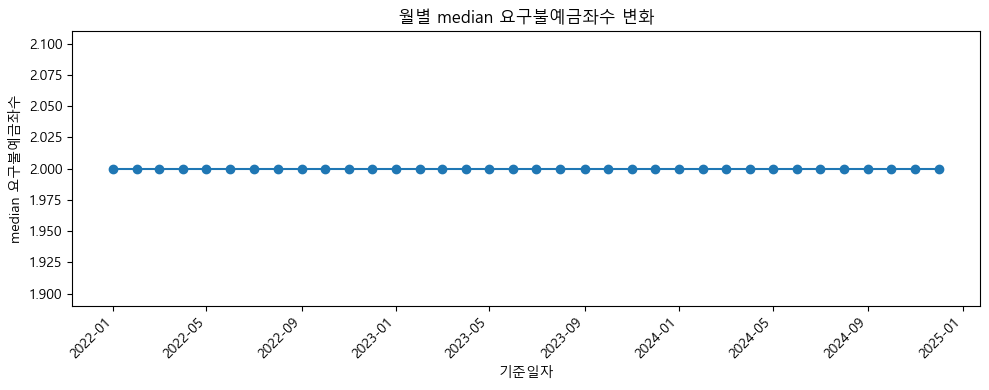

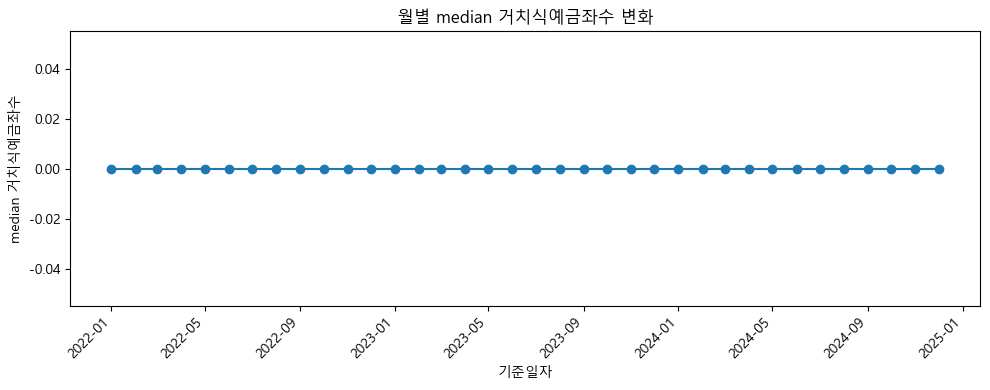

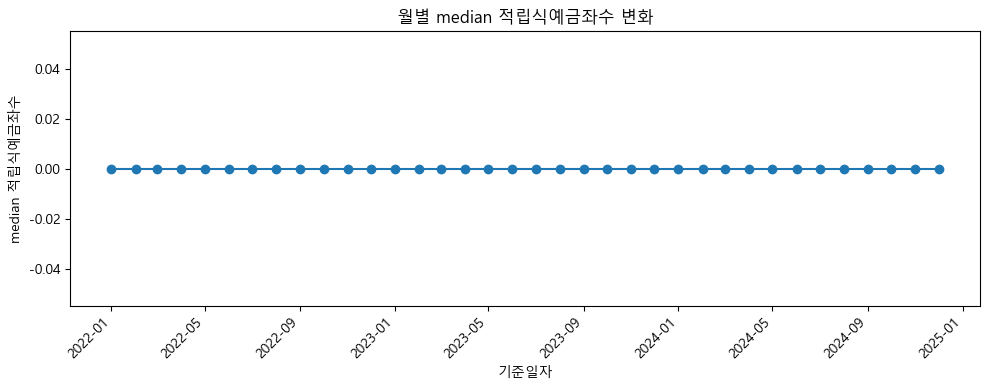

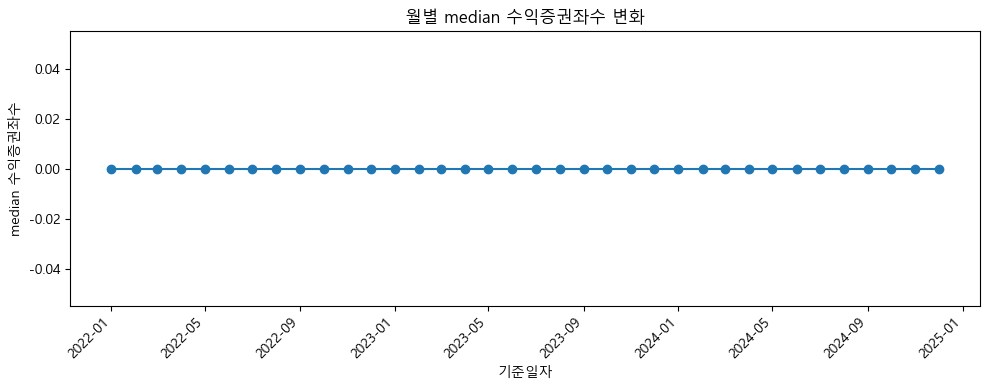

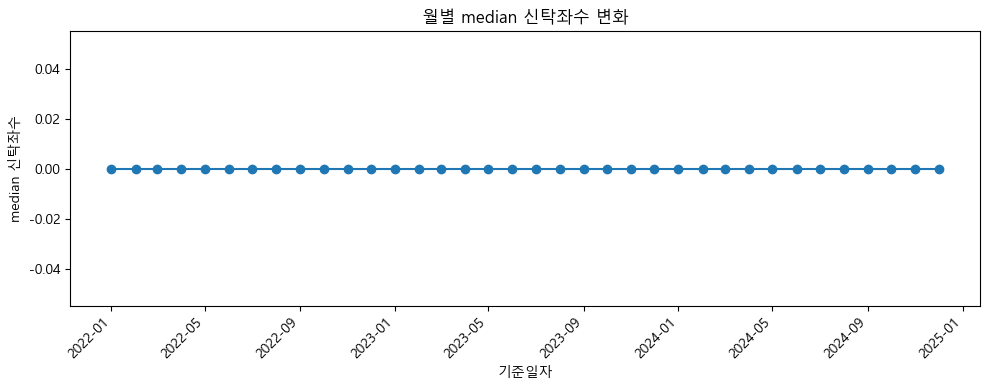

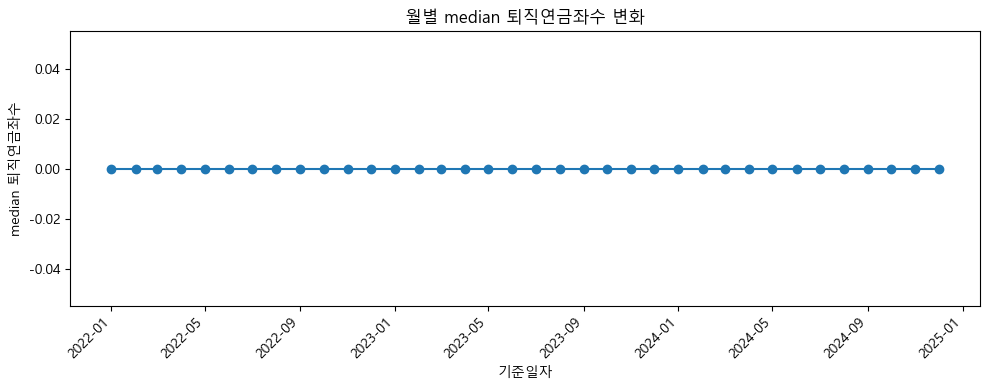

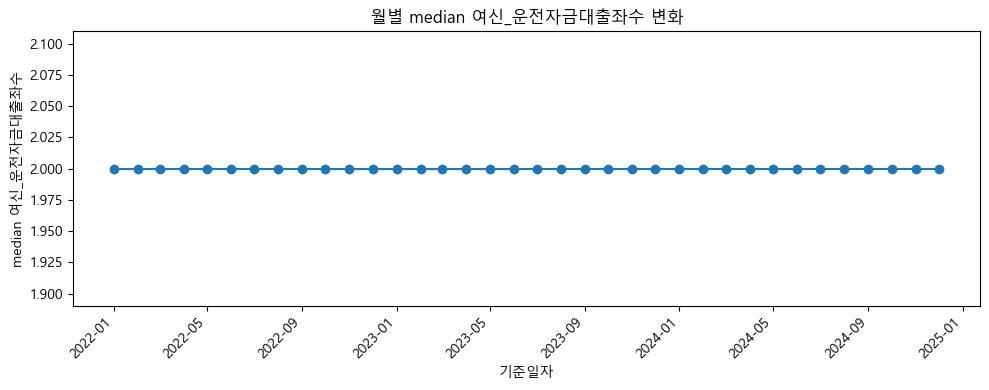

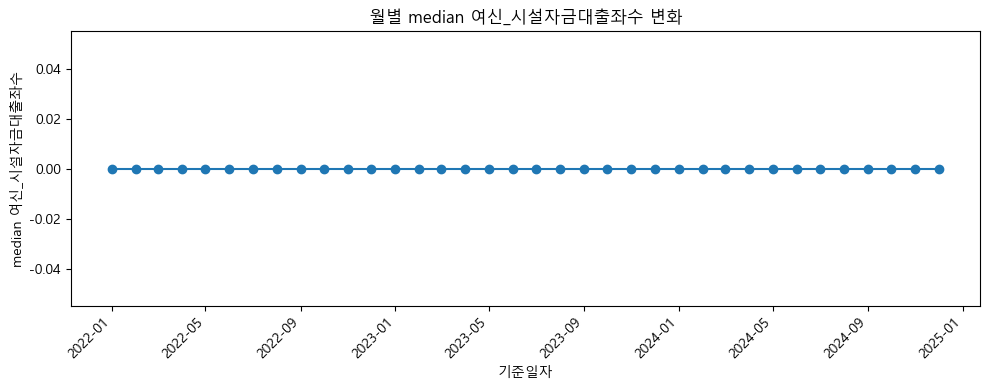

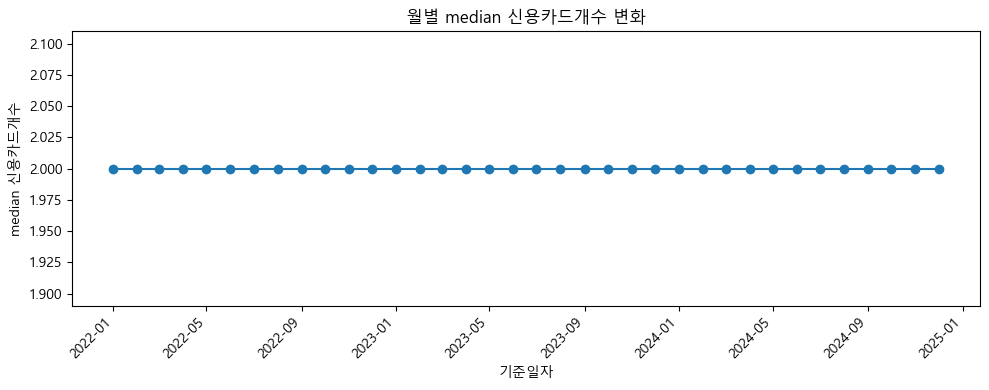

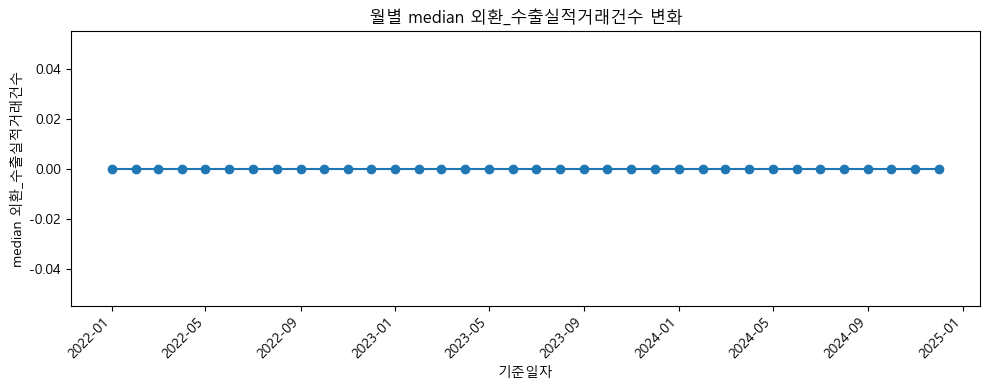

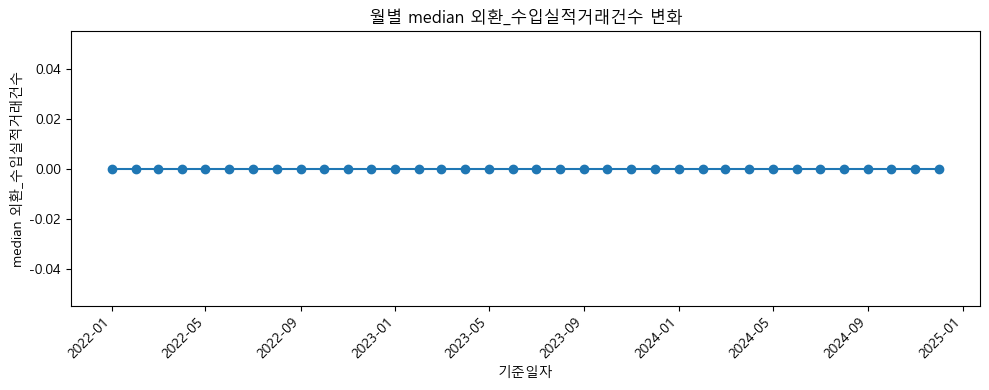

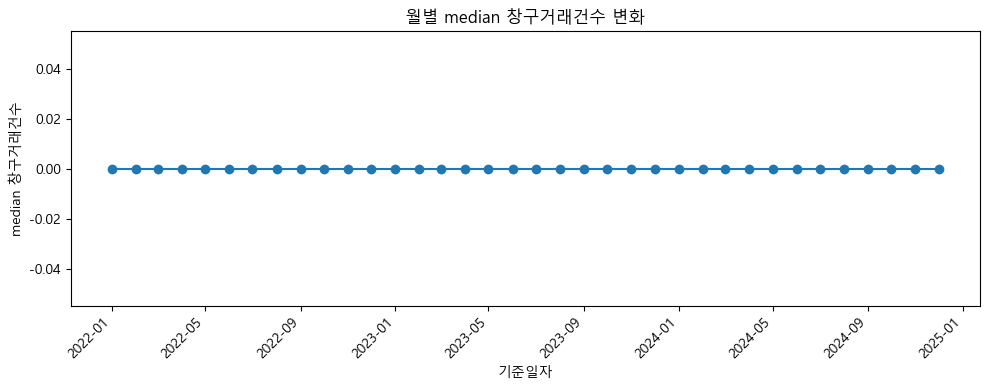

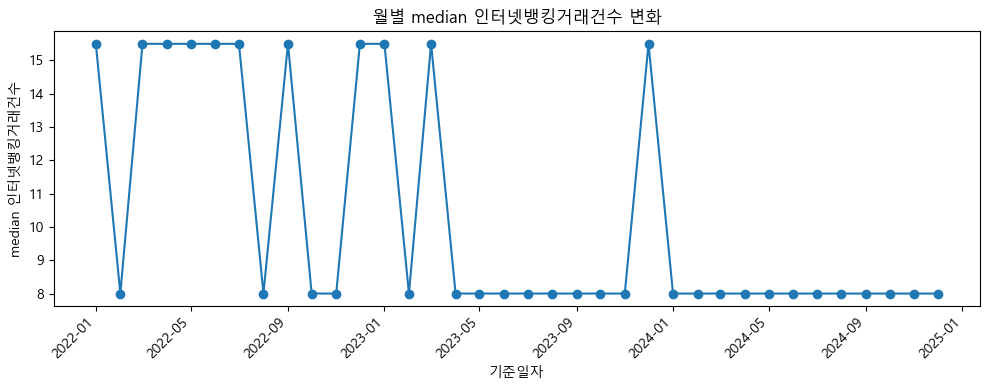

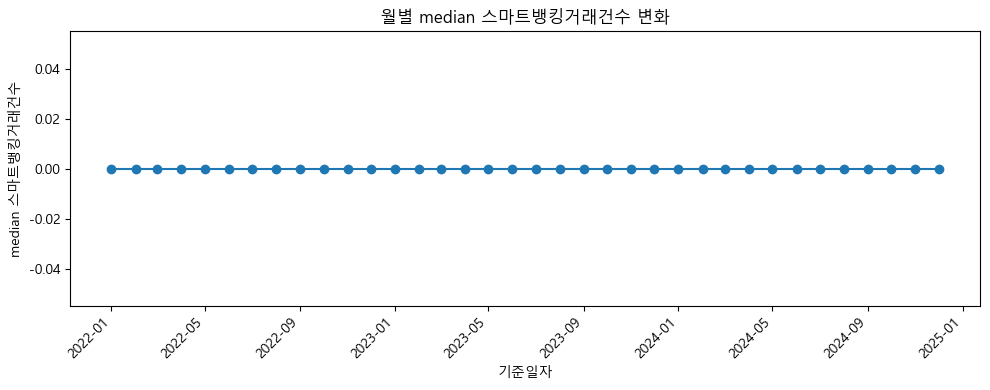

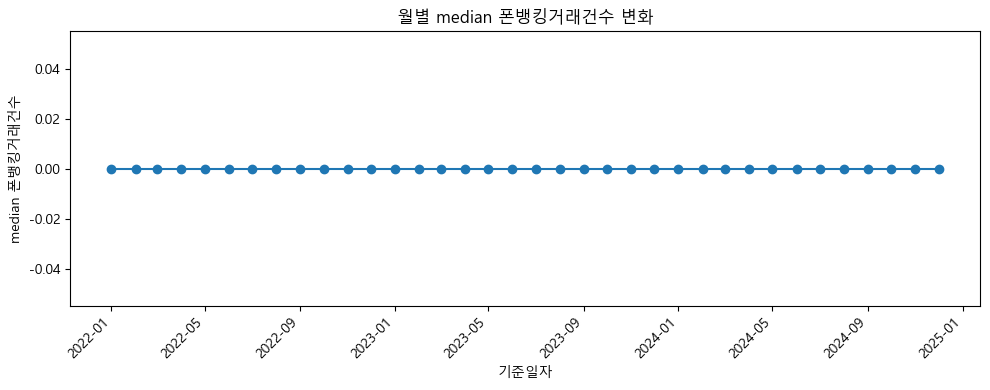

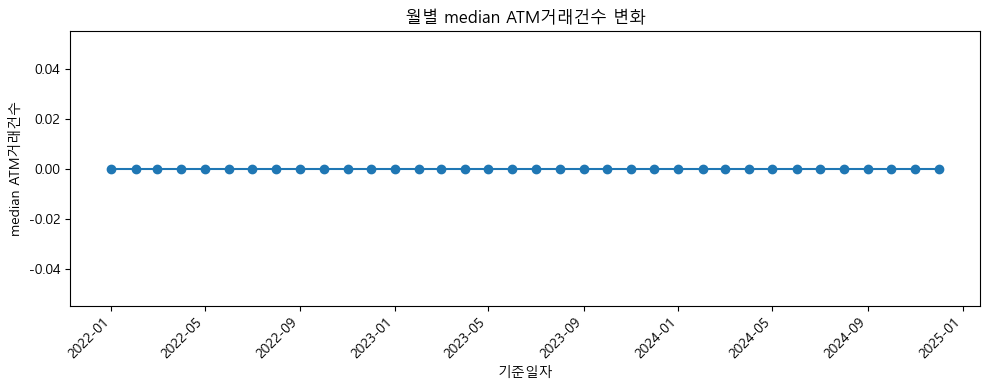

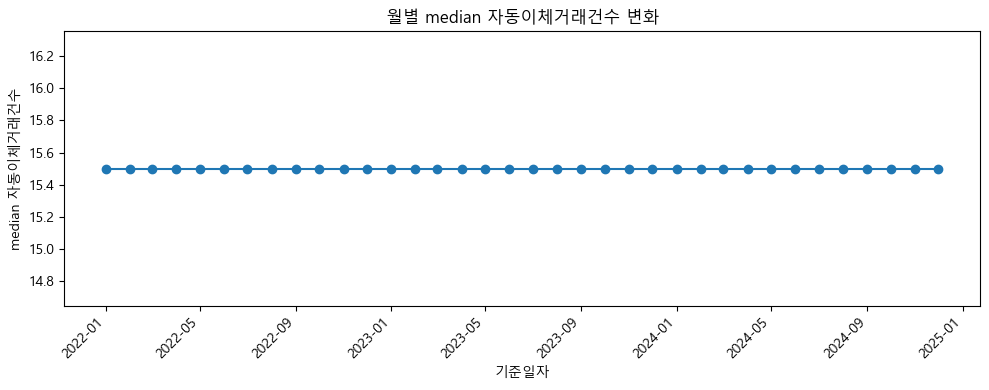

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기준
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드 (인코딩된 파일 경로 확인)
df = pd.read_csv('../../Datas/인코딩된_data.csv')

# 기준년월을 datetime으로 변환
df['기준일자'] = pd.to_datetime(df['기준년월'].astype(str), format='%Y%m')

# 컬럼 리스트에서 요구불예금좌수부터 자동이체거래건수까지 선택
cols = list(df.columns)
start = cols.index('요구불예금좌수')
end = cols.index('자동이체거래건수') + 1
encoded_cols = cols[start:end]

# 월별 median 계산
monthly_medians = df.groupby('기준일자')[encoded_cols].median().reset_index()

# 각 컬럼별 월별 변화 시각화
for col in encoded_cols:
    plt.figure(figsize=(10, 4))
    plt.plot(monthly_medians['기준일자'], monthly_medians[col], marker='o')
    plt.title(f'월별 median {col} 변화')
    plt.xlabel('기준일자')
    plt.ylabel(f'median {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
